<a href="https://colab.research.google.com/github/HarpyTech/DSAI-MTech/blob/main/TSF/Class_Notes/TSF_GL_Nov2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pyforest

In [1]:
import pandas as pd

FILE_NAME = "https://raw.githubusercontent.com/skathirmani/datasets/refs/heads/main/narendramodi_tweets.csv"

tweets = pd.read_csv(FILE_NAME)

tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [2]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3220 non-null   float64
 1   retweets_count        3220 non-null   float64
 2   favorite_count        3220 non-null   float64
 3   created_at            3220 non-null   object 
 4   text                  3220 non-null   object 
 5   lang                  3220 non-null   object 
 6   retweeted             3220 non-null   bool   
 7   followers_count       3220 non-null   float64
 8   friends_count         3220 non-null   float64
 9   hashtags_count        3220 non-null   float64
 10  description           3220 non-null   object 
 11  location              3220 non-null   object 
 12  background_image_url  3220 non-null   object 
 13  source                3220 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 330.3+ KB


In [4]:
tweets["date"] = pd.to_datetime(tweets["created_at"])

tweets["day"] = tweets["date"].dt.day
tweets["month"] = tweets["date"].dt.month
tweets["year"] = tweets["date"].dt.year
tweets["year_month"] = tweets["date"].dt.to_period("M") # strftime("%Y-%m")
tweets["year_month_day"] = tweets["date"].dt.to_period("D") # strftime("%Y-%m-%d")

tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,date,day,month,year,year_month,year_month_day
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 11:00:07,31,1,2017,2017-01,2017-01-31
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:59:12,31,1,2017,2017-01,2017-01-31
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:33,31,1,2017,2017-01,2017-01-31
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:22,31,1,2017,2017-01,2017-01-31
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:16,31,1,2017,2017-01,2017-01-31


In [15]:
values = tweets.year_month.value_counts()

values.sort_index(inplace=True)

values = pd.DataFrame(values)
values.reset_index(inplace=True)
values.columns = ["year_month", "total_tweets"]

values

,year_month,total_tweets
0,2016-03,157
1,2016-04,201
2,2016-05,307
3,2016-06,413
4,2016-07,303
5,2016-08,383
6,2016-09,292
7,2016-10,393
8,2016-11,255
9,2016-12,260


<IPython.core.display.Javascript object>

<Axes: ylabel='total_tweets'>

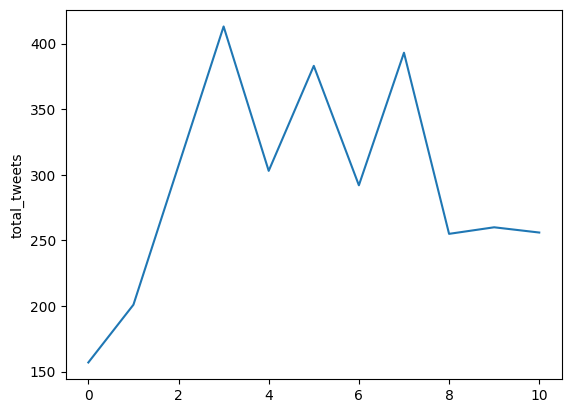

In [16]:
sns.lineplot(values.total_tweets)

In [19]:
tweets.resample(on="date", rule="ME")["id"].count()
# here the rules can be M - month, Y - Year, d - day, ME - Month End, YE - Year End
# similary for Start of Period is MS, YS etc

,id
date,
2016-03-31,157
2016-04-30,201
2016-05-31,307
2016-06-30,413
2016-07-31,303
2016-08-31,383
2016-09-30,292
2016-10-31,393
2016-11-30,255


In [20]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3220 non-null   float64       
 1   retweets_count        3220 non-null   float64       
 2   favorite_count        3220 non-null   float64       
 3   created_at            3220 non-null   object        
 4   text                  3220 non-null   object        
 5   lang                  3220 non-null   object        
 6   retweeted             3220 non-null   bool          
 7   followers_count       3220 non-null   float64       
 8   friends_count         3220 non-null   float64       
 9   hashtags_count        3220 non-null   float64       
 10  description           3220 non-null   object        
 11  location              3220 non-null   object        
 12  background_image_url  3220 non-null   object        
 13  source            

<Axes: xlabel='date'>

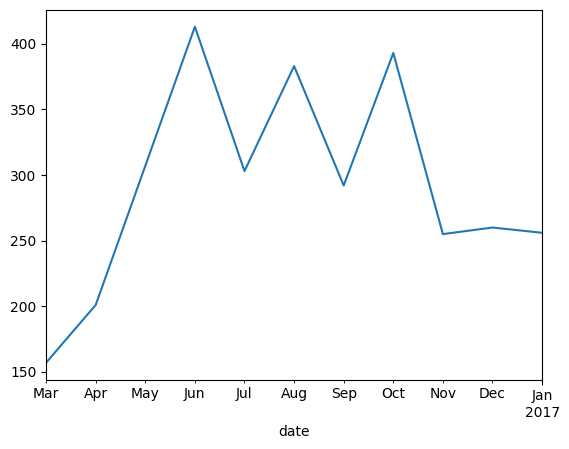

In [21]:
tweets.resample(on="date", rule="ME")["id"].count().plot.line()

<Axes: xlabel='date'>

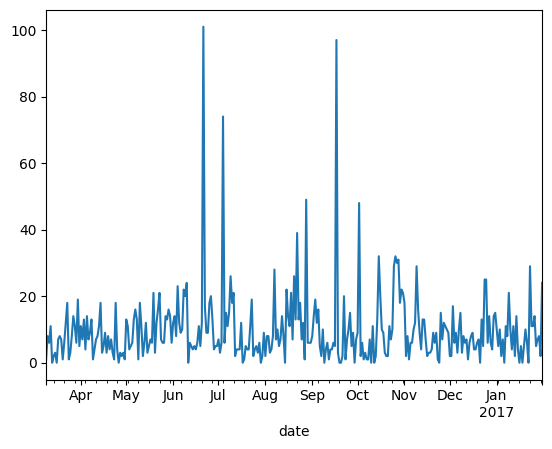

In [22]:
tweets.resample(on="date", rule="d")["id"].count().plot.line()